## ALGORITMOS
- Gamero Palacios, Diego Armando
- Leon Flores, Abel Giankrlo

In [2]:
## importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
##cargamos la base de datos
dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv',sep=';')
clasificadores=['Benigno','Maligno']

In [6]:
dataframe.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [8]:
dataframe.groupby('Severity').size()

Severity
0    425
1    395
dtype: int64

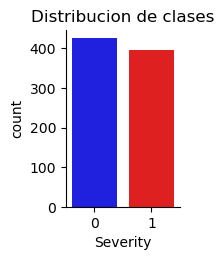

In [10]:
sb.catplot(x='Severity', hue='Severity',data=dataframe, kind="count", height=2.5, aspect=0.8,palette={0:"blue",1:"red"}, legend=False)
plt.title("Distribucion de clases")
plt.show()

In [12]:
### DIVISION DE CONJUNTO DE DATOS
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

NameError: name 'x' is not defined